In [26]:
import os
import keras
import numpy as np
import cv2
from matplotlib import pyplot as plt

### Experimenting with CelebFaces
* We load the imgs with CV2 which loads in BGR on 255 scale 
* We convert to BGR -> RGB on 1 scale

In [27]:
img = cv2.imread('../dataset/faces/000001.jpg')

In [28]:
print(img.shape)

(218, 178, 3)


In [29]:
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(rgb_img[0,0,:]/255)

[0.99215686 0.90588235 0.76078431]


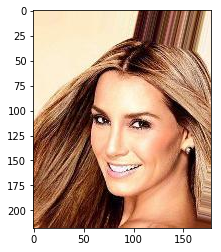

In [30]:
plt.imshow(rgb_img)

### Prepare dataset for training
* Load images from directory
* Convert BGR scale 255 to RBG with scale of 1

In [31]:
files = os.listdir('../dataset/faces/')

In [44]:
imgs = np.empty([0,218,178,3])
y = np.array([])
for i,x in enumerate(files[0:2]):
    img = cv2.imread('../dataset/faces/%s'% x)
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)[:,:,:]/255
    imgs = np.vstack((imgs, [rgb_img]))

(218, 178, 3)
(218, 178, 3)
(218, 178, 3)


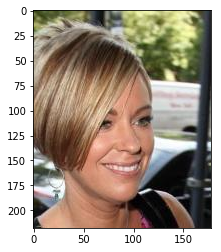

In [45]:
plt.imshow(imgs[0])

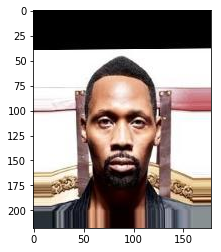

In [46]:
plt.imshow(imgs[1])